## Inštalácia knižnice a príprava dát

In [3]:
# Importujeme knižnicu pandas na prácu s tabuľkovými dátami
import pandas as pd
# Importujeme knižnicu matplotlib na vizualizácie
import matplotlib.pyplot as plt
# Tento príkaz umožňuje zobrazovať grafy priamo v Jupyter Notebooku
%matplotlib inline

In [13]:
# Načítame CSV súbor s dátami do objektu DataFrame
data = pd.read_csv('toxicity_analysis_userrating.csv')

In [14]:
# Určíme zoznam stĺpcov, ktoré chceme odstrániť
columns_to_drop = ['lime_rating', 'deeplift_rating', 'integrated_gradients_rating', 'shap_rating', 'created_at', 'email']
# Odstránime určené stĺpce z tabuľky
data = data.drop(columns=columns_to_drop)

In [15]:
# Uložíme upravený DataFrame do nového CSV súboru bez indexov
data.to_csv('output.csv', index=False)

In [16]:
# Zobrazí rozmery tabuľky (počet riadkov a stĺpcov)
data.shape

(44, 30)

In [17]:
# Zobrazí posledné 3 riadky tabuľky
data.tail(3)

,id,text,deeplift_explanation_goodness,deeplift_system_controllability,deeplift_user_curiosity,deeplift_user_productivity,deeplift_user_satisfaction,deeplift_user_trust,deeplift_user_understanding,integrated_gradients_explanation_goodness,...,lime_user_satisfaction,lime_user_trust,lime_user_understanding,shap_explanation_goodness,shap_system_controllability,shap_user_curiosity,shap_user_productivity,shap_user_satisfaction,shap_user_trust,shap_user_understanding
41,48,"You're so stupid, I can't believe you actually...",4,3,4,4,4,4,4,4,...,3,5,4,4,2,3,3,4,3,4
42,49,Why do you even try? You’re useless,2,2,2,3,2,2,2,4,...,4,3,3,4,3,3,3,4,3,3
43,50,"Go back to your country, we don’t need people ...",4,4,4,3,4,4,4,3,...,3,5,4,3,3,4,3,3,4,2


## Vykreslenie grafov pre každú z metrík

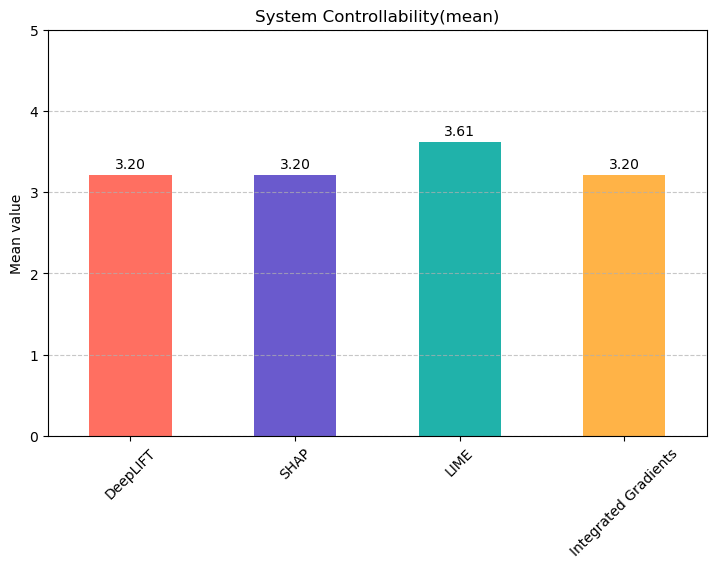

In [24]:
# Definujeme funkciu na vizualizáciu porovnania priemernej ovládateľnosti systému medzi rôznymi metódami
def plot_system_controllability_comparison(df):
    # Zoznam stĺpcov, ktoré reprezentujú ovládateľnosť systému pre jednotlivé metódy
    columns = [
        'deeplift_system_controllability',
        'shap_system_controllability',
        'lime_system_controllability',
        'integrated_gradients_system_controllability'
    ]
    # Vypočítame priemernú hodnotu pre každý zo stĺpcov
    avg_values = df[columns].mean()

    # Premenujeme indexy kvôli zrozumiteľnosti grafu
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    # Celkový priemer medzi všetkými metódami
    overall_mean = avg_values.mean()

    # Veľkosť grafu
    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    # Vykreslíme stĺpcový graf s priemernými hodnotami
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    # Názov grafu
    plt.title('System Controllability(mean)')
    # Popis osi Y
    plt.ylabel('Mean value')
    # Otočenie popisov na osi X
    plt.xticks(rotation=45)
    # Nastavíme rozsah osi Y od 0 do 5
    plt.ylim(0, 5)
    # Zobrazíme číselné hodnoty nad každým stĺpcom
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    # Pridáme mriežku na os Y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    # Zobrazíme graf
    plt.show()
# Zavoláme funkciu s dátovým rámcom
plot_system_controllability_comparison(data)

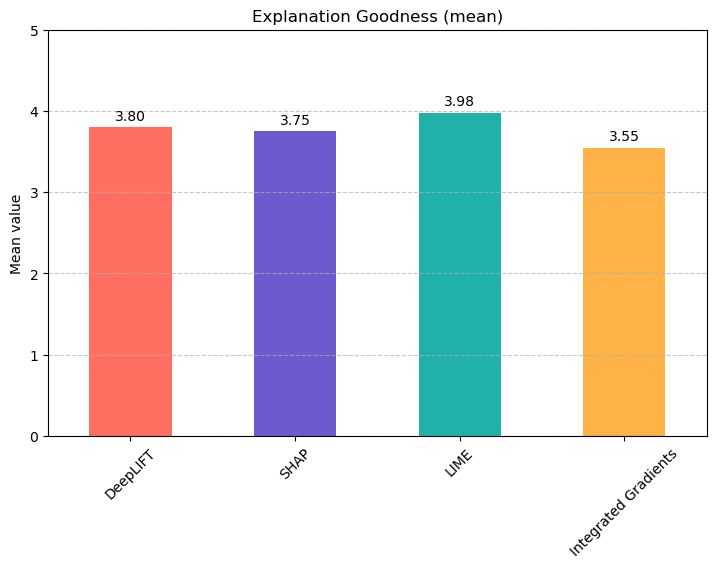

In [25]:
def plot_explanation_goodness_comparison(df):
    columns = [
        'deeplift_explanation_goodness',
        'shap_explanation_goodness',
        'lime_explanation_goodness',
        'integrated_gradients_explanation_goodness'
    ]
    
    avg_values = df[columns].mean()
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    overall_mean = avg_values.mean()
    diff = avg_values - overall_mean

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    plt.title('Explanation Goodness (mean)')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_explanation_goodness_comparison(data)

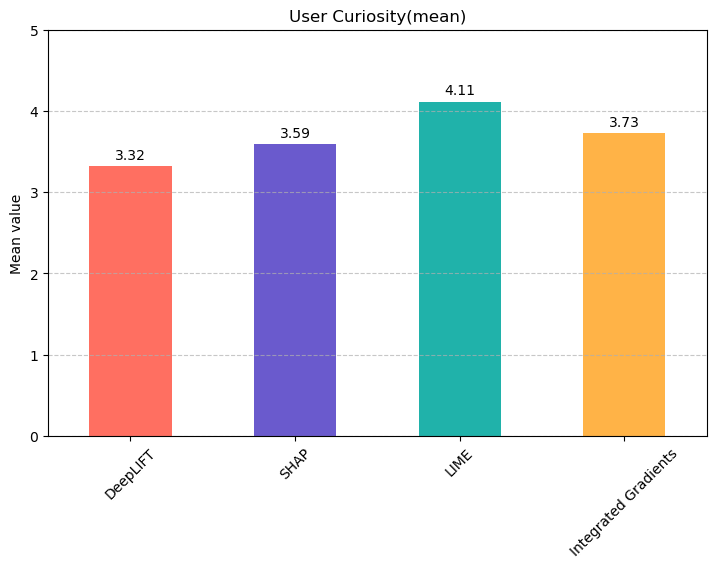

In [26]:
def plot_user_curiosity_comparison(df):
    columns = [
        'deeplift_user_curiosity',
        'shap_user_curiosity',
        'lime_user_curiosity',
        'integrated_gradients_user_curiosity'
    ]
    
    avg_values = df[columns].mean()
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    overall_mean = avg_values.mean()
    diff = avg_values - overall_mean

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    plt.title('User Curiosity(mean)')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_user_curiosity_comparison(data)

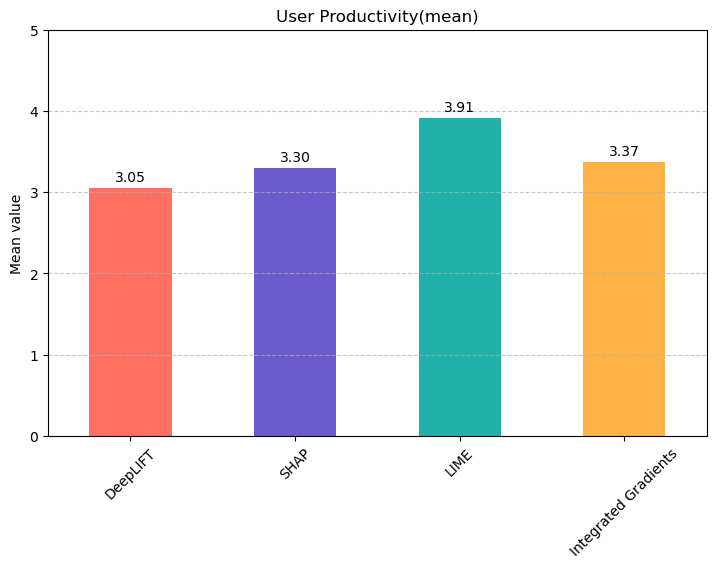

In [39]:
def plot_user_productivity_comparison(df):
    columns = [
        'deeplift_user_productivity',
        'shap_user_productivity',
        'lime_user_productivity',
        'integrated_gradients_user_productivity'
    ]
    
    avg_values = df[columns].mean()
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    overall_mean = avg_values.mean()
    diff = avg_values - overall_mean

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    plt.title('User Productivity(mean)')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_user_productivity_comparison(data)

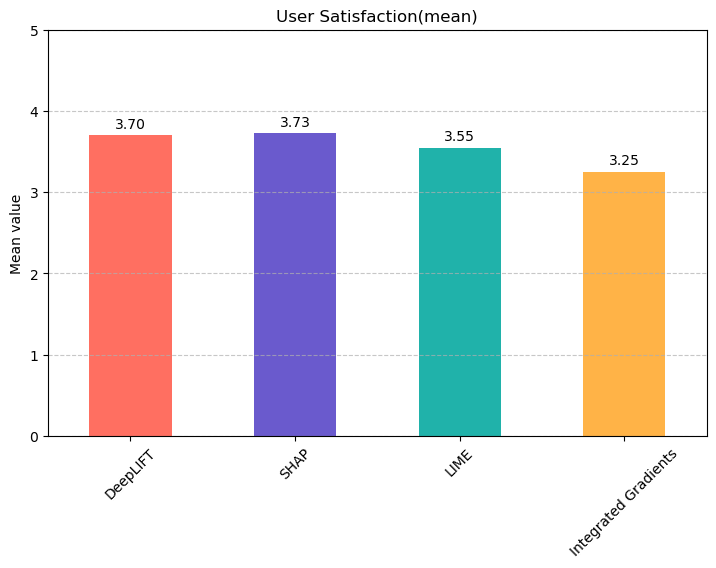

In [36]:
def plot_user_satisfaction_comparison(df):
    columns = [
        'deeplift_user_satisfaction',
        'shap_user_satisfaction',
        'lime_user_satisfaction',
        'integrated_gradients_user_satisfaction'
    ]
    
    avg_values = df[columns].mean()
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    overall_mean = avg_values.mean()
    diff = avg_values - overall_mean

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    plt.title('User Satisfaction(mean)')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_user_satisfaction_comparison(data)

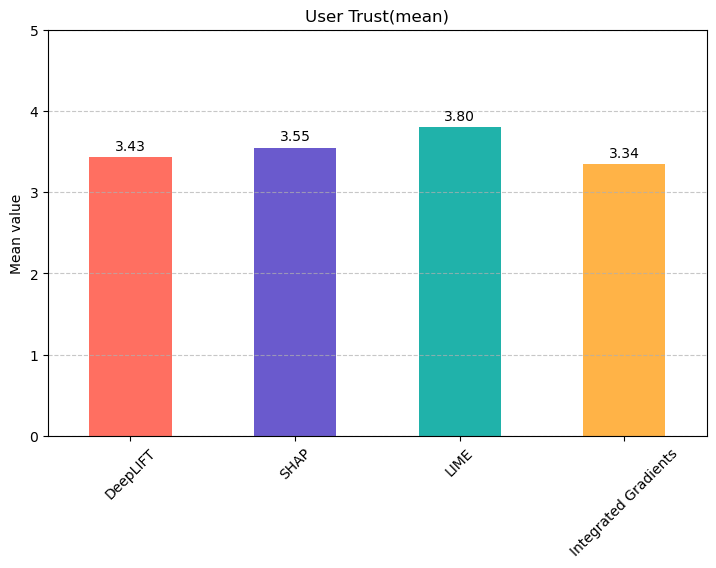

In [37]:
def plot_user_trust_comparison(df):
    columns = [
        'deeplift_user_trust',
        'shap_user_trust',
        'lime_user_trust',
        'integrated_gradients_user_trust'
    ]
    
    avg_values = df[columns].mean()
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    overall_mean = avg_values.mean()
    diff = avg_values - overall_mean

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    plt.title('User Trust(mean)')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_user_trust_comparison(data)

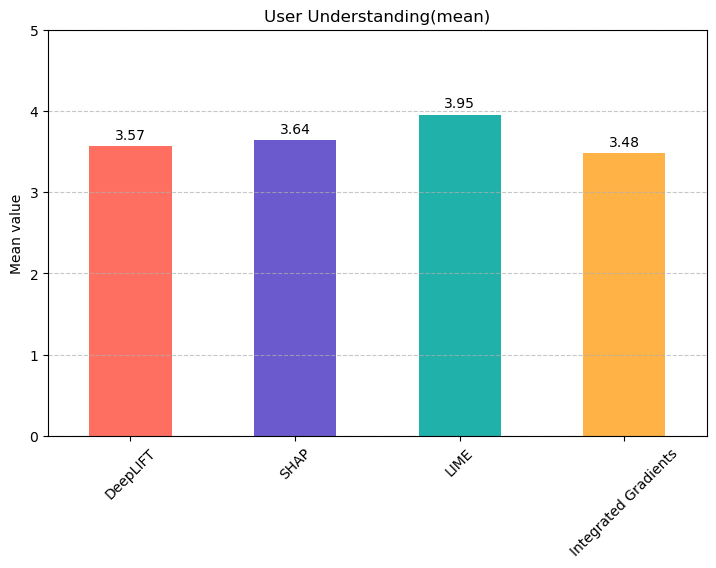

In [38]:
def plot_user_understanding_comparison(df):
    columns = [
        'deeplift_user_understanding',
        'shap_user_understanding',
        'lime_user_understanding',
        'integrated_gradients_user_understanding'
    ]
    
    avg_values = df[columns].mean()
    avg_values.index = ['DeepLIFT', 'SHAP', 'LIME', 'Integrated Gradients']

    overall_mean = avg_values.mean()
    diff = avg_values - overall_mean

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    bars = avg_values.plot(kind='bar', color=['#FF6F61', '#6A5ACD', '#20B2AA', '#FFB347'])
    plt.title('User Understanding(mean)')
    plt.ylabel('Mean value')
    plt.xticks(rotation=45)
    plt.ylim(0, 5)
    for i, value in enumerate(avg_values):
        plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_user_understanding_comparison(data)

## Vytvorenie tabuľky s konečnými výsledkami

In [30]:
# Vytvárame slovník, kde kľúče sú názvy metód vysvetlenia (DeepLIFT, SHAP, atď.),
# a hodnoty sú zoznamy priemerov hodnotení rôznych kritérií (ovládateľnosť, zvedavosť, produktivita atď.)
methods = {
    'DeepLIFT': [
        data['deeplift_system_controllability'].mean(),
        data['deeplift_user_curiosity'].mean(),
        data['deeplift_user_productivity'].mean(),
        data['deeplift_user_satisfaction'].mean(),
        data['deeplift_user_trust'].mean(),
        data['deeplift_user_understanding'].mean(),
        data['deeplift_explanation_goodness'].mean(),
    ],
    'SHAP': [
        data['shap_system_controllability'].mean(),
        data['shap_user_curiosity'].mean(),
        data['shap_user_productivity'].mean(),
        data['shap_user_satisfaction'].mean(),
        data['shap_user_trust'].mean(),
        data['shap_user_understanding'].mean(),
        data['shap_explanation_goodness'].mean(),
    ],
    'LIME': [
        data['lime_system_controllability'].mean(),
        data['lime_user_curiosity'].mean(),
        data['lime_user_productivity'].mean(),
        data['lime_user_satisfaction'].mean(),
        data['lime_user_trust'].mean(),
        data['lime_user_understanding'].mean(),
        data['lime_explanation_goodness'].mean(),
    ],
    'Integrated Gradients': [
        data['integrated_gradients_system_controllability'].mean(),
        data['integrated_gradients_user_curiosity'].mean(),
        data['integrated_gradients_user_productivity'].mean(),
        data['integrated_gradients_user_satisfaction'].mean(),
        data['integrated_gradients_user_trust'].mean(),
        data['integrated_gradients_user_understanding'].mean(),
        data['integrated_gradients_explanation_goodness'].mean(),
    ]
}

# Pre každú metódu vypočítame celkové priemerné skóre ako priemer všetkých metrík
final_scores = {method: sum(scores)/len(scores) for method, scores in methods.items()}

# Premeníme výsledky do DataFrame objektu s dvoma stĺpcami: názov metódy a celkové skóre
final_df = pd.DataFrame(list(final_scores.items()), columns=['Method', 'Overall Score'])

# Zoradíme metódy podľa celkového skóre zostupne
final_df = final_df.sort_values(by='Overall Score', ascending=False)

In [31]:
final_df

,Method,Overall Score
2,LIME,3.844156
1,SHAP,3.535714
0,DeepLIFT,3.438312
3,Integrated Gradients,3.416793
